In [15]:
import numpy as np
import itertools
import ast
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
feeds = [1, 12, 2, 20, 21, 23, 28, 29, 30, 33, 35, 40, 5, 6]

In [4]:
a = [95, 346, 89, 97, 412, 85, 301, 183, 35, 45, 23, 287, 430, 41]
r = [24, 21, 12, 9, 49, 15, 4, 5, 17, 8, 6, 9, 149, 10]
a = [float(el) for el in a]
r = [float(el) for el in r]

a = dict(zip(feeds,a))
r = dict(zip(feeds,a))

In [5]:
len(a)

14

In [7]:
sum(a.values())

2469.0

In [8]:
np.mean(r.values())

20.357142857142858

In [61]:
sum(a) * 0.5

142.5

In [62]:
range(len(a))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [63]:
def sublists(xs):
    l = len(xs)
    for i in range(1 << l):
        incl, excl = [], []
        for j in range(l):
            if i & (1 << j):
                incl.append(xs[j])
            else:
                excl.append(xs[j])
        yield (incl, excl)

In [64]:
perms = list(sublists(feeds))

In [65]:
perms[0]

([], [1, 12, 2, 20, 21, 23, 28, 29, 30, 33, 35, 40, 5, 6])

In [66]:
list(perms[0])[0]

[]

In [67]:
perms_dev = perms[0:10]

In [68]:
def balance_sublists(perms):
    
    max_mean = 1.0
    save_set = []
    
    for p in perms:
        l = list(p)
        train = l[0]
        test = l[1]

        train_article_sum = sum([a[i] for i in train])
        train_label_sum = sum([r[i] for i in train])
        test_article_sum = sum([a[i] for i in test])
        test_label_sum = sum([r[i] for i in test])
        
        a_ratio = (1+train_article_sum)/(1+test_article_sum)
        r_ratio = (1+train_label_sum)/(1+test_label_sum) 
        mean_ratio = (a_ratio + r_ratio)/2
        
        if np.abs(0.5 - mean_ratio) < np.abs(0.5 - max_mean):
            max_mean = mean_ratio
            save_set = l
        
#         print train, test
#         print train_article_sum, train_label_sum
#         print test_article_sum, test_label_sum
#         print a_ratio, r_ratio
#         print mean_ratio
        
    print "algo output"
    print max_mean
    print save_set

In [69]:
balance_sublists(perms)

algo output
0.499595469256
[[1, 12, 21, 28, 30, 33], [2, 20, 23, 29, 35, 40, 5, 6]]


In [97]:
params_str = '{"n_clusters": [1,2,3,4,5,6,7,8,9,10]}'

In [99]:
params = ast.literal_eval(params_str)
params_grid = list(itertools.product(*params.values()))

for p_inst in params_grid:
    print p_inst
    params_inst = {}
    p_list = list(p_inst)
    for i, key in enumerate(params): 
        params_inst[key] = p_list[i]
    print "params_inst", params_inst

(1,)
params_inst {'n_clusters': 1}
(2,)
params_inst {'n_clusters': 2}
(3,)
params_inst {'n_clusters': 3}
(4,)
params_inst {'n_clusters': 4}
(5,)
params_inst {'n_clusters': 5}
(6,)
params_inst {'n_clusters': 6}
(7,)
params_inst {'n_clusters': 7}
(8,)
params_inst {'n_clusters': 8}
(9,)
params_inst {'n_clusters': 9}
(10,)
params_inst {'n_clusters': 10}


In [12]:
print np.cumsum(a.values())*0.08

[   7.6    14.72   16.56   50.96   54.24   57.84   80.8   108.48  116.24
  149.2   156.    180.08  194.72  197.52]


In [13]:
cum_a = np.cumsum(a.values())
clusters = cum_a * 0.08
mac_f1 = [0.8, 0.93, 0.77, 0.81, 0.75, 0.73, 0.66, 0.63, 0.67, 0.69]
mic_f1 = [0.8, 0.93, 0.75, 0.79, 0.68, 0.67, 0.64, 0.63, 0.61, 0.65]

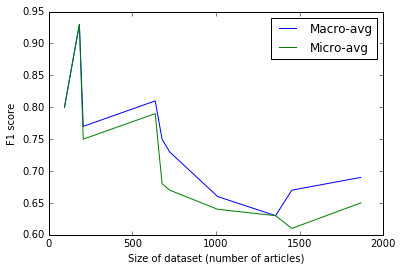

In [19]:
plt.figure(figsize=())
plt.plot(cum_a[:10], mac_f1)
plt.plot(cum_a[:10], mic_f1)
plt.ylabel('F1 score')
plt.xlabel('Size of dataset (number of articles)')
plt.legend(['Macro-avg', 'Micro-avg'])